In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Dependents,0,1,0,0,0,2,0,3+,2,1
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

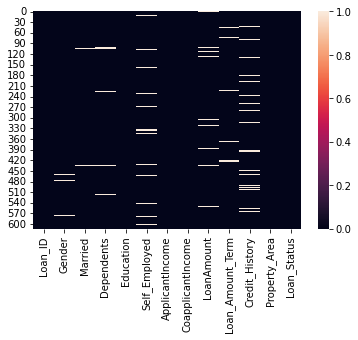

In [6]:
sns.heatmap(df.isnull())

As pr above visualizaion there are so many Null values found un Data Set

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Visualization

Male      502
Female    112
Name: Gender, dtype: int64

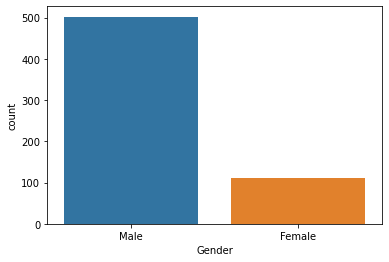

In [16]:
sns.countplot(x='Gender', data=df)
df['Gender'].value_counts()

As per above visulization there are 502 male customers and 112 are female customers

Yes    401
No     213
Name: Married, dtype: int64

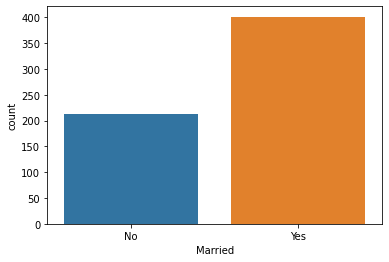

In [18]:
sns.countplot(x='Married', data=df)
df['Married'].value_counts()

As per above visulization there are 401 are married customers and 213 are Non Married customers

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

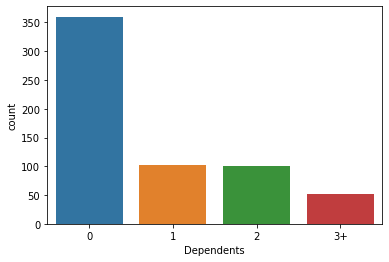

In [20]:
sns.countplot(x='Dependents', data=df)
df['Dependents'].value_counts()

As per above visulization there are 360 customers has no dependent, 102 customer has 1 dependent, 101 customer has 2 dependents and 51 customers has 3+ dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

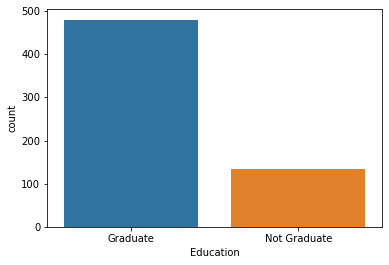

In [21]:
sns.countplot(x='Education', data=df)
df['Education'].value_counts()

As per above observation there are 480 customers are Graduate and 134 customers are Non Graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64

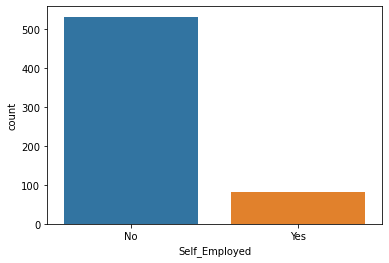

In [22]:
sns.countplot(x='Self_Employed', data=df)
df['Self_Employed'].value_counts()

As per above observation there are 82 customers are self employed and 532 customers are Non Self-employed

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

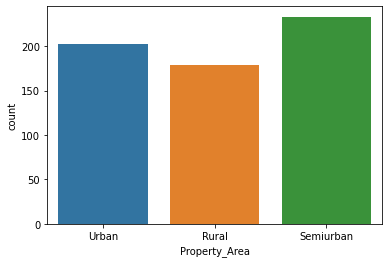

In [23]:
sns.countplot(x='Property_Area', data=df)
df['Property_Area'].value_counts()

As per above observation 179 customers are from Rural area 202 customers are from Urban area and 233 customers are from SemiUrban areas

Y    422
N    192
Name: Loan_Status, dtype: int64

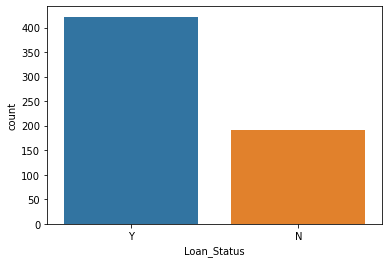

In [24]:
sns.countplot(x='Loan_Status', data=df)
df['Loan_Status'].value_counts()

As per above observation there are 2 status Yes and No as 422 has status Yes and 192 has Status No

1.0    525
0.0     89
Name: Credit_History, dtype: int64

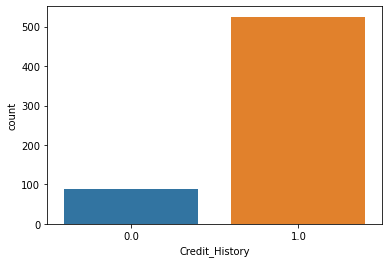

In [25]:
sns.countplot(x='Credit_History', data=df)
df['Credit_History'].value_counts()

As per Above observation 525 has credit histort 1 and 89 has credit History 0.0

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

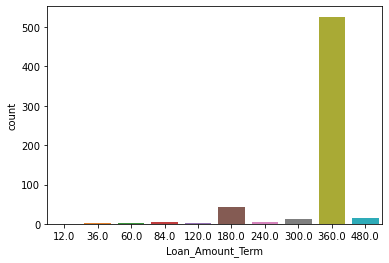

In [26]:
sns.countplot(x='Loan_Amount_Term', data=df)
df['Loan_Amount_Term'].value_counts()

As per above observation the Maximum Loan_amount Term is 360.0 which is 526 times. Rest others are very less

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

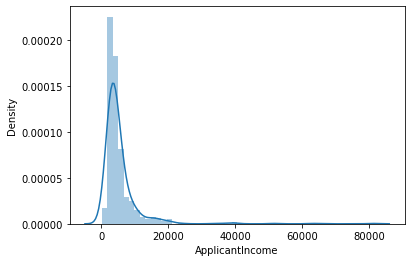

In [30]:
sns.distplot(a=df['ApplicantIncome'], kde=True)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

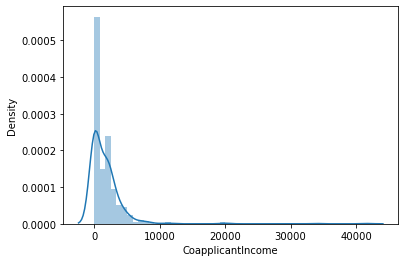

In [29]:
sns.distplot(a=df['CoapplicantIncome'], kde=True)

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

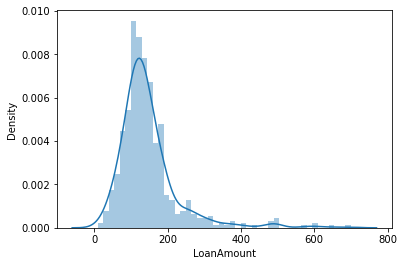

In [32]:
sns.distplot(a=df['LoanAmount'], kde=True)

As per above visualizations the Normal distribution has right skewed so skewness is present

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

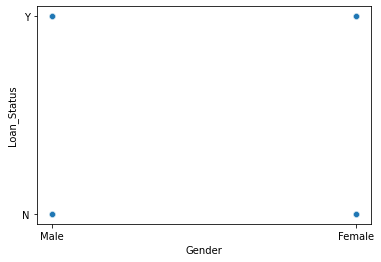

In [36]:
sns.scatterplot(data=df,x='Gender',y='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

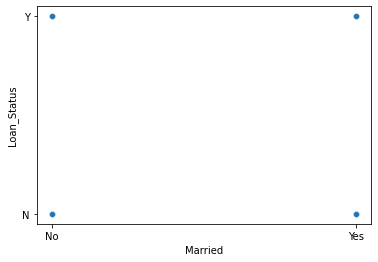

In [37]:
sns.scatterplot(data=df,x='Married',y='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

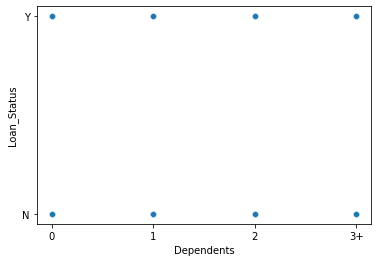

In [38]:
sns.scatterplot(data=df,x='Dependents',y='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

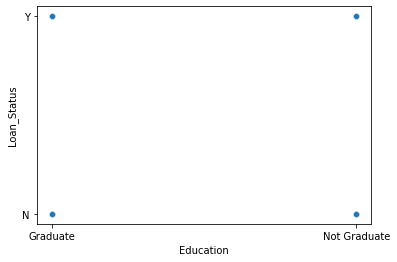

In [39]:
sns.scatterplot(data=df,x='Education',y='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

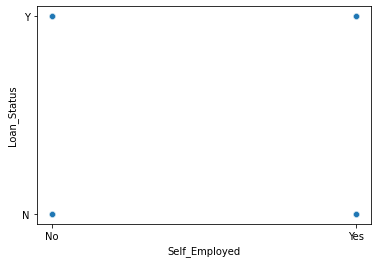

In [40]:
sns.scatterplot(data=df,x='Self_Employed',y='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

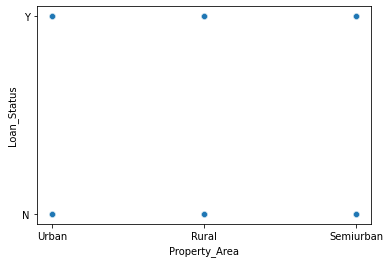

In [41]:
sns.scatterplot(data=df,x='Property_Area',y='Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

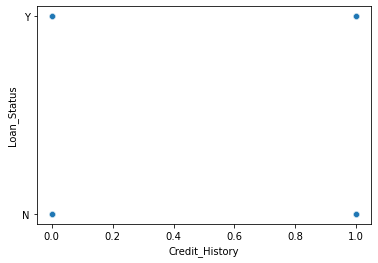

In [42]:
sns.scatterplot(data=df,x='Credit_History',y='Loan_Status')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

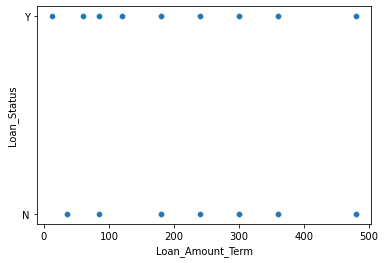

In [43]:
sns.scatterplot(data=df,x='Loan_Amount_Term',y='Loan_Status')

As per above visualization all object dataypes are equally distrubuted with Target varible. Loan_Amount_Term is not equally disributes as some outliers are there.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

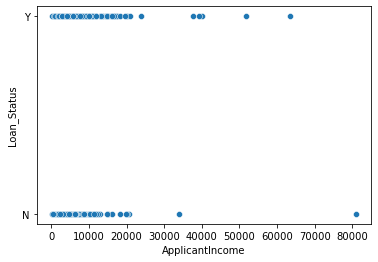

In [45]:
sns.scatterplot(data=df,x='ApplicantIncome',y='Loan_Status')

Applicant Income is not equally coorelated with Target variable also some Outliers are present

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

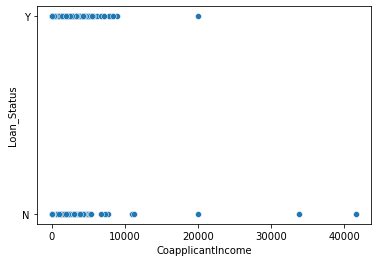

In [46]:
sns.scatterplot(data=df,x='CoapplicantIncome',y='Loan_Status')

Applicant Income is not equally coorelated with Target variable also some Outliers are present

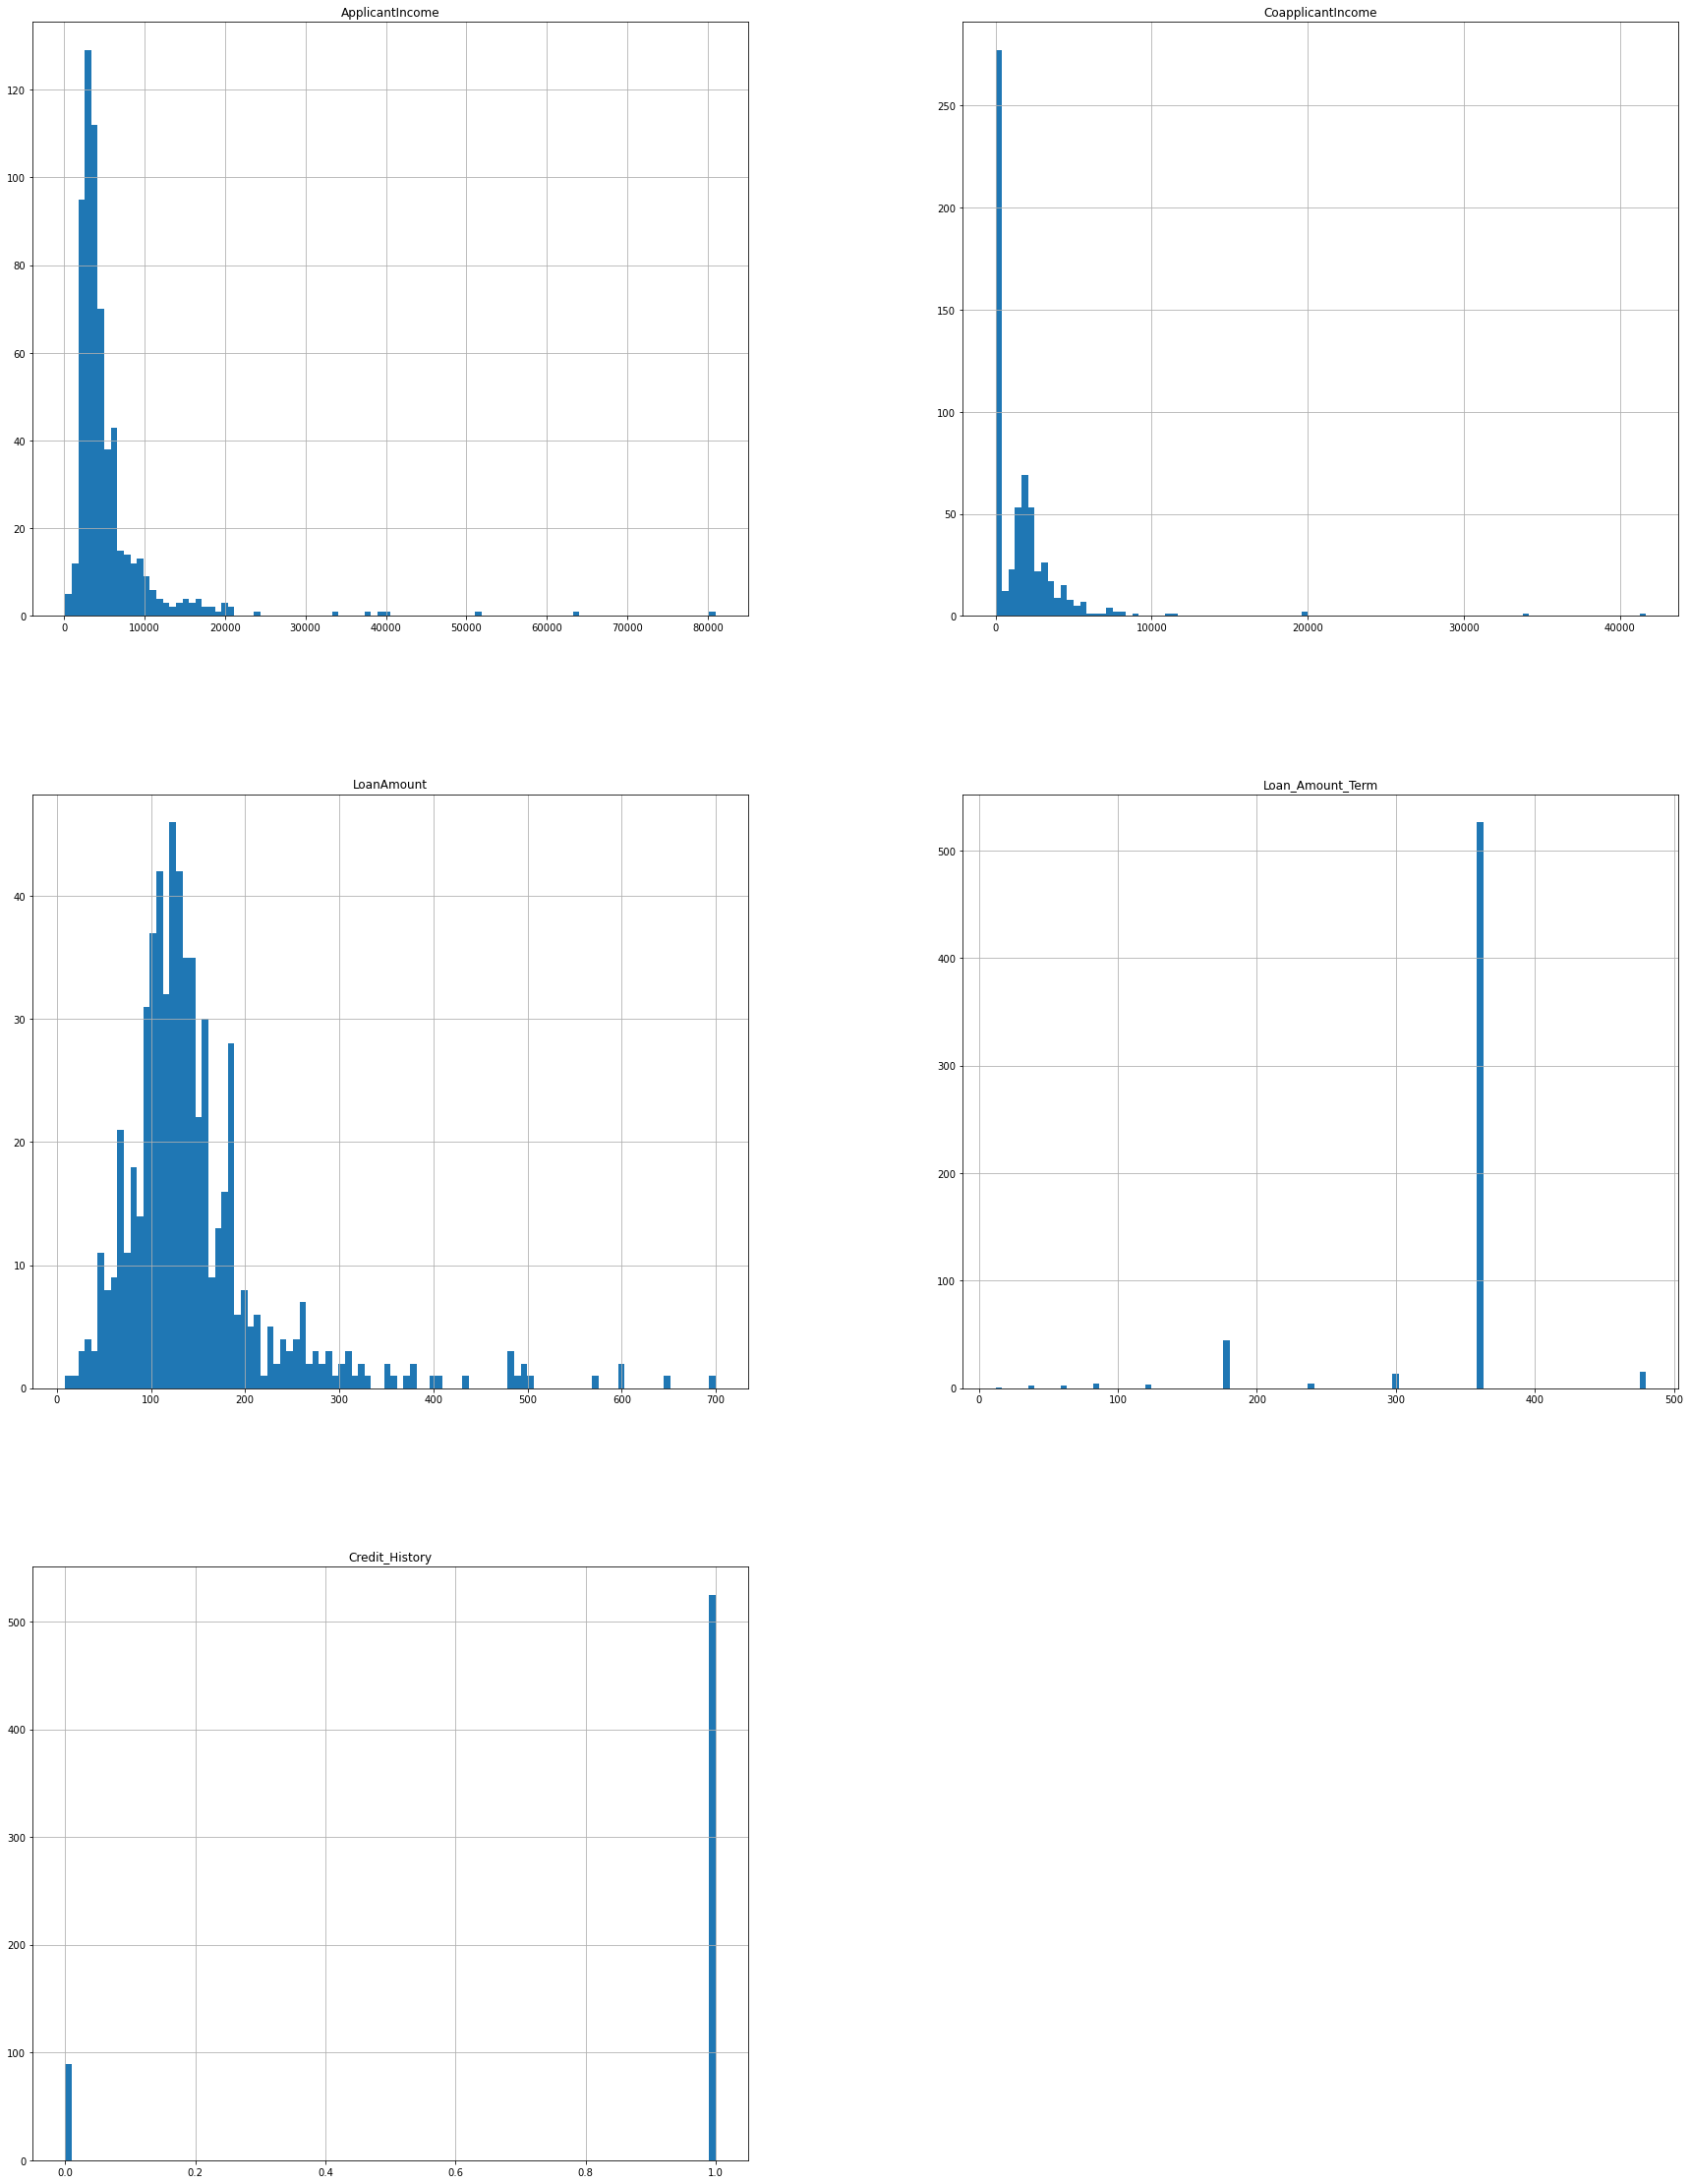

In [47]:
df.hist(figsize= (30,40), bins =100, xlabelsize = 10, ylabelsize = 10)
plt.show()

# Label Encoder

In [48]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

C:\Users\NITIN GUPTA\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


As per above data ther difference between min,25%,50%,75% and max are not equal so skewness is present in Data

Dropping Loan_Id is best idea as no use of it

In [51]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [53]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

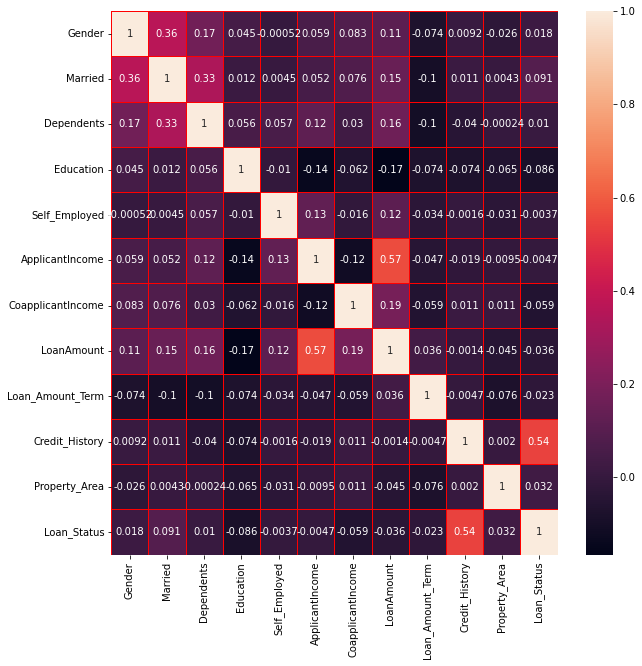

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, linewidth=1, linecolor='red')

As per above visualization Credit_History is highly coorelated with Target Variable. LoanAMount , CoapplicantIncome and Applicant Income are negatively coorelated with Target Variable

In [55]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Removing Skewness

In [57]:
from sklearn.preprocessing import power_transform

In [58]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]=power_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],method='yeo-johnson')

# Cheking Outliers

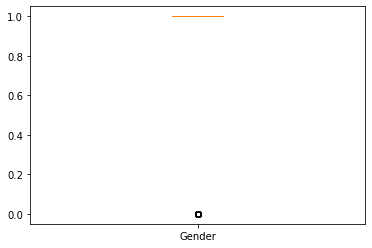

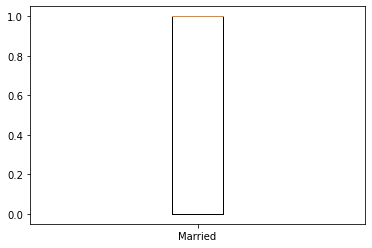

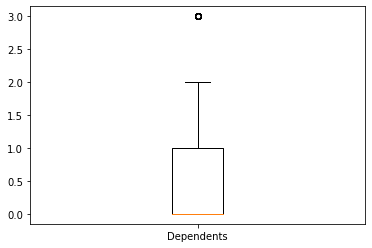

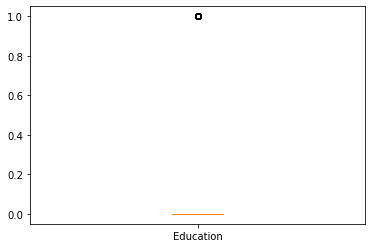

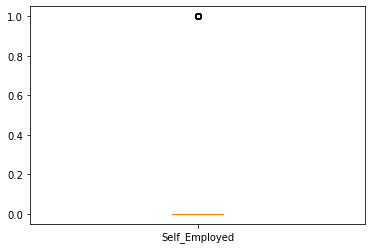

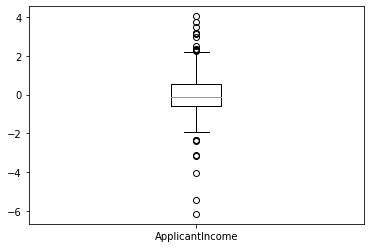

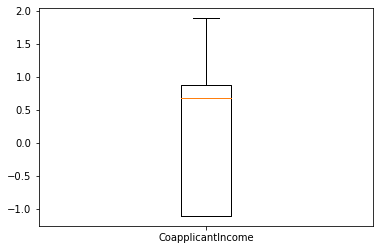

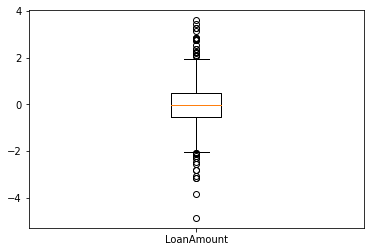

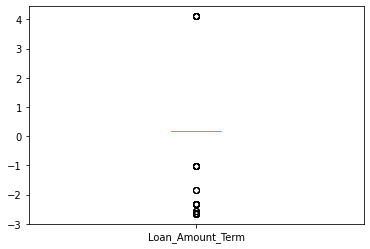

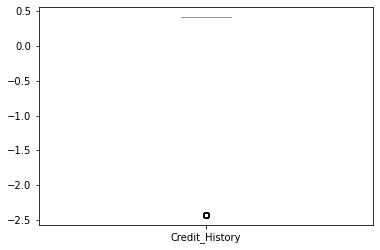

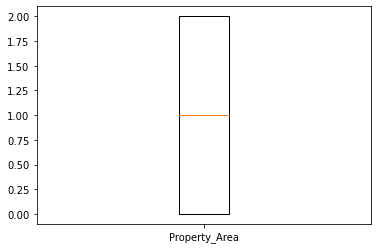

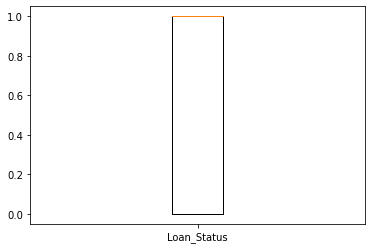

In [59]:
for i in df:
    plt.boxplot(df[i], labels= [i])
    plt.show()

# Z Score

In [60]:
from scipy.stats import zscore

z=np.abs(zscore(df[['LoanAmount','CoapplicantIncome']]))
print(np.where(z>3))

(array([ 14,  94, 130, 133, 155, 171, 369, 555, 561, 568], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [62]:
z=np.abs(zscore(df[['LoanAmount','CoapplicantIncome']]))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

print("with outliers::",df.shape)
print("After removing outliers::",df_new.shape)

with outliers:: (614, 12)
After removing outliers:: (604, 12)


In [63]:
print ("Percentage of data loss: ", ((614-604)/614)*100)

Percentage of data loss:  1.6286644951140066


# Splitting feature and target vatiables

In [66]:
x= df_new.iloc[:,0:-1]
y= df_new.iloc[:,-1]

In [70]:
x.shape

(604, 11)

In [71]:
y.shape

(604,)

# Scaling using Min Max Scaler

In [72]:
from sklearn.preprocessing import MinMaxScaler

mn=MinMaxScaler()
x=mn.fit_transform(x)

# For Balancing the data using SMOTE

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smt= SMOTE()

In [75]:
x_sm, y_sm = smt.fit_resample(x, y)
print(f'''Shape of x before SMOTE: {x.shape}
Shape of x after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of x before SMOTE: (604, 11)
Shape of x after SMOTE: (828, 11)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Loan_Status, dtype: float64

# Importing Model

In [76]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [77]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size= .22, random_state=42)
estimator = []
estimator.append(('LR',LogisticRegression()))
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('SV',SVC()))
estimator.append(('DT',DecisionTreeClassifier()))
estimator.append(('RF',RandomForestClassifier(n_estimators=100, random_state=42)))
estimator

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('SV', SVC()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier(random_state=42))]

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [79]:
vot_hard = VotingClassifier(estimators= estimator, voting= 'hard')
vot_hard.fit(xtrain,ytrain)
pred = vot_hard.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.7923497267759563
Confusion Metrics [[68 31]
 [ 7 77]]
Classification_report               precision    recall  f1-score   support

           0       0.91      0.69      0.78        99
           1       0.71      0.92      0.80        84

    accuracy                           0.79       183
   macro avg       0.81      0.80      0.79       183
weighted avg       0.82      0.79      0.79       183



In [80]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100, random_state=42)
mod = [LR, KNN, SV, DT, RF]

mod

[LogisticRegression(),
 KNeighborsClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(random_state=42)]

In [81]:
for i in mod:
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= .22, random_state=42)
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    print("Accuracy Score", accuracy_score(ytest,pred))
    print("Confusion Metrics", confusion_matrix(ytest,pred))
    print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.7669172932330827
Confusion Metrics [[19 30]
 [ 1 83]]
Classification_report               precision    recall  f1-score   support

           0       0.95      0.39      0.55        49
           1       0.73      0.99      0.84        84

    accuracy                           0.77       133
   macro avg       0.84      0.69      0.70       133
weighted avg       0.81      0.77      0.74       133

Accuracy Score 0.7518796992481203
Confusion Metrics [[20 29]
 [ 4 80]]
Classification_report               precision    recall  f1-score   support

           0       0.83      0.41      0.55        49
           1       0.73      0.95      0.83        84

    accuracy                           0.75       133
   macro avg       0.78      0.68      0.69       133
weighted avg       0.77      0.75      0.73       133

Accuracy Score 0.7669172932330827
Confusion Metrics [[19 30]
 [ 1 83]]
Classification_report               precision    recall  f1-score   support

           0

As per above results support vector classifier & Logistic Regression has best accuracy

# Now we can check with various parameter using Grid Search CV

In [82]:
from sklearn.model_selection import GridSearchCV
model = SVC()

In [83]:
param_grid = {'kernel' :['rbf','poly','linear'], "C":[0.1,1,10]}

In [84]:
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [85]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'poly', 'linear']})

In [86]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8237402015677493
SVC(C=0.1, kernel='poly')
{'C': 0.1, 'kernel': 'poly'}


As per Grid Search CV we found the best accuracy when kernel='poly', c= 0.1

In [91]:
SVV = SVC(kernel='poly', C=0.1)

In [92]:
SVV.fit(xtrain,ytrain)
pred = SVV.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,pred))
print("Confusion Metrics", confusion_matrix(ytest,pred))
print("Classification_report", classification_report(ytest,pred))

Accuracy Score 0.7669172932330827
Confusion Metrics [[19 30]
 [ 1 83]]
Classification_report               precision    recall  f1-score   support

           0       0.95      0.39      0.55        49
           1       0.73      0.99      0.84        84

    accuracy                           0.77       133
   macro avg       0.84      0.69      0.70       133
weighted avg       0.81      0.77      0.74       133



# Cross validation score for Support Vector Classifier

In [93]:
from sklearn.model_selection import cross_val_score
for i in range (2,10):
    score= cross_val_score(SVV,x,y,cv=i)
    print("At cv value at", i,"the cv score is",score)
    print(score.mean())
    print(score.std())

At cv value at 2 the cv score is [0.79139073 0.83112583]
0.8112582781456954
0.019867549668874163
At cv value at 3 the cv score is [0.8019802 0.7960199 0.8358209]
0.8112736646799009
0.017527239622262606
At cv value at 4 the cv score is [0.80794702 0.78145695 0.82781457 0.82781457]
0.8112582781456954
0.0190217306176756
At cv value at 5 the cv score is [0.80991736 0.78512397 0.7768595  0.85950413 0.825     ]
0.8112809917355372
0.02961273619928866
At cv value at 6 the cv score is [0.82178218 0.78217822 0.77227723 0.82178218 0.83       0.84      ]
0.8113366336633664
0.02504655339451097
At cv value at 7 the cv score is [0.82758621 0.7816092  0.76744186 0.79069767 0.86046512 0.80232558
 0.84883721]
0.8112804063084736
0.03251717102086795
At cv value at 8 the cv score is [0.81578947 0.78947368 0.77631579 0.78947368 0.8        0.86666667
 0.78666667 0.86666667]
0.8113815789473684
0.03365672278249902
At cv value at 9 the cv score is [0.79411765 0.82089552 0.79104478 0.76119403 0.7761194  0.850746

# AUC ROC CURVE

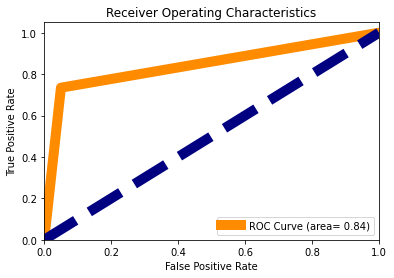

In [94]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred, ytest)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color = "darkorange", lw =10, label ="ROC Curve (area= %0.2f)" %roc_auc)
plt.plot([0,1], [0,1], color= 'navy', lw =10, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc ="lower right")
plt.show()

# Model Saving

In [95]:
import pickle
filename = "Loan.pkl"
pickle.dump(SVV, open(filename, 'wb'))

# Conclusion

In [96]:
import numpy as np
a = np.array(ytest)
predicted =np.array(SVV.predict(xtrain))
df_com= pd.DataFrame({"Original":a, "Predicted":pred}, index =range(len(a)))
df_com

,Original,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
128,0,1
129,0,1
130,1,1
131,0,0
